In [39]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as mpl

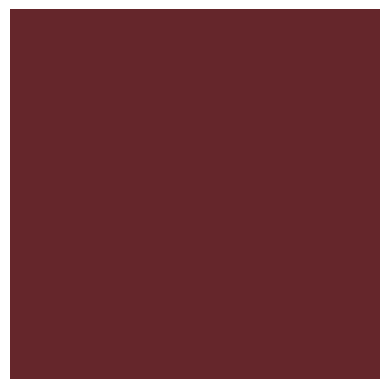

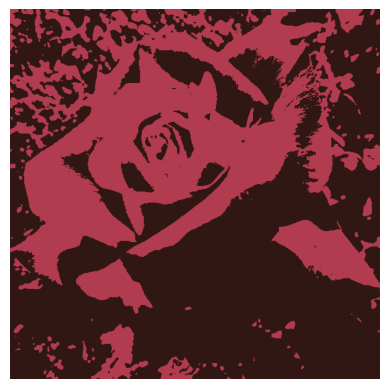

In [40]:

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        global image
        image = mpl.image.imread(file_path)
        img = Image.open(file_path)
        img.thumbnail((400, 400))
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img

def segment_image():
    if image is not None:
        n_clusters = int(cluster_entry.get())
        X = image.reshape(-1, 3)
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X)
        segmented_img = kmeans.cluster_centers_[kmeans.labels_]
        segmented_img = segmented_img.reshape(image.shape)
        plt.imshow(segmented_img / 255)
        plt.axis('off')
        plt.show()

app = tk.Tk()
app.title("Image Segmentation with K-Means")

image = None

load_button = tk.Button(app, text="Load Image", command=load_image)
load_button.pack(pady=10)

cluster_label = tk.Label(app, text="Number of Clusters:")
cluster_label.pack()
cluster_entry = tk.Entry(app)
cluster_entry.pack()

segment_button = tk.Button(app, text="Segment Image", command=segment_image)
segment_button.pack(pady=10)

image_label = tk.Label(app)
image_label.pack()

app.mainloop()
